### What is a network?
- Nodes/verticies
- links/edges/ties/arcs
- Also called a graph

Bipartite: Networks with two types of node
- Students and Mentors
- Stores and Distributors

Weighted: Networks with ties of different strength
- Twitter users and the number of retweets
- People and distance between homes
- Cities and the dollars of trade
- Cities and the number of travelers

Directed Networks:
- An edge is not always symmetrical
- Travel from one city to another
- Sales from one country to another
- Phone calls from one person to another
- Twitter mentions

Representing a network: Edge List
- Dyads
- Each row contains a pair of nodes indicating a tie
- A third column can indicate weight
- Order may indicate direction of the edge

Representing a network: Adjacency Matrix
- nxn matrix of nodes, where position i,j indicates relationship between node i and node j
- Can be symmetrical or directed, use weights or indicators with 1
- Less space efficient for sparse networks, but convenient for linear algebra operations

Packages for today:
- NetworkX: network analysis package
- scipy, numpy, pandas: math and data frames
- itertools: Built in package for iterating
- Matplotlib: required for making plots
- Statsmodels to run regression

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

Start with a toy network

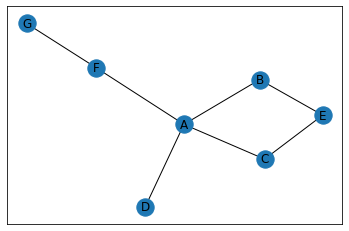

In [2]:
G = nx.Graph() # Initiate the object
G.add_nodes_from(['A','B','C','D','E','F','G']) # Lay out nodes (Red circles)
G.add_edges_from([('A','B'),('A','C'),
                  ('A','D'),('A','F'),
                  ('B','E'),('C','E'),
                  ('F','G')]) # Pairs that will be connected. 
nx.draw_networkx(G, with_labels=True) # The ties will remain the same but the visual might look slightly different
# each time. 

# We'd need someway to turn a follower, followee connection into the pairwise list above. 

Centrality
- Way to measure the nature of the connectedness of a group

Degree Centrality
- Number of ties
- Sum of rows
- In-degree: number of edges to a node
- Out-degree: number of edges from a node

In [3]:
deg = nx.degree_centrality(G)
print(deg)
# A ends up with heighest because it is connected to the most (4)

{'A': 0.6666666666666666, 'B': 0.3333333333333333, 'C': 0.3333333333333333, 'D': 0.16666666666666666, 'E': 0.3333333333333333, 'F': 0.3333333333333333, 'G': 0.16666666666666666}


Eigenvector Centrality
- Connectedness to other well-connected nodes
- Theoretical Implication: A lot of work to maintain ties to everyone, sometimes just as good to know someone who knows everyone.
    - Finding a job
    - Rumors
    - Supply
- Requires connected network
- Cannot compare across networks

Calculating Eigenvector Centrality
- Take eigenvector for maximum eigenvalue
- nx.eigenvector_centrality uses a different method that usually converges to the same result, but sometimes errors.

In [4]:
eig_c = nx.eigenvector_centrality_numpy(G)
toy_adj = nx.adjacency_matrix(G)
print(eig_c)
val,vec = np.linalg.eig(toy_adj.toarray())
print(val)
vec[:,0]

# A still best obviously. 
# While D and G were previously the same because they were just connected to one node, D is better here 
# because it's connected to A with all it's connections and G is just connected to F with it's one. Same 
# reason B better than E. 

{'A': 0.5982414608737613, 'B': 0.4086581125324871, 'C': 0.40865811253248724, 'D': 0.257378302857514, 'E': 0.3516296958052569, 'F': 0.3158377801038941, 'G': 0.13588124049894004}
[ 2.32436633e+00 -2.32436633e+00  1.14718388e+00  5.30368089e-01
 -1.14718388e+00 -5.30368089e-01 -4.25262560e-17]


array([-0.59824146, -0.40865811, -0.40865811, -0.2573783 , -0.3516297 ,
       -0.31583778, -0.13588124])

Betweenness Centrality
- Proportional to the number of shortest paths that pass through a given node
- How important is that node in connecting other nodes
- Medicci family was not well connected, but strategically connected.

In [5]:
betw = nx.betweenness_centrality(G)
print(betw)

# E and F better than B and C here. G and D at 0. 

{'A': 0.7666666666666666, 'B': 0.13333333333333333, 'C': 0.13333333333333333, 'D': 0.0, 'E': 0.03333333333333333, 'F': 0.3333333333333333, 'G': 0.0}


Centrality Measures Are Different
- Select based on theory you want to capture

In [6]:
cent_scores = pd.DataFrame({'deg':deg,'eig_c':eig_c,'betw':betw})
print(cent_scores.corr())
cent_scores

            deg     eig_c     betw
deg    1.000000  0.931207  0.92745
eig_c  0.931207  1.000000  0.79676
betw   0.927450  0.796760  1.00000


,deg,eig_c,betw
A,0.666667,0.598241,0.766667
B,0.333333,0.408658,0.133333
C,0.333333,0.408658,0.133333
D,0.166667,0.257378,0.000000
E,0.333333,0.351630,0.033333
F,0.333333,0.315838,0.333333
G,0.166667,0.135881,0.000000


Transitivity
- Extent to which friends have friends in common
- Probability two nodes are tied given that they have a partner in common
- Make a more transitive network:

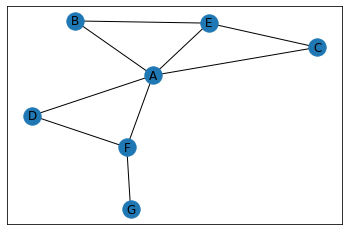

In [7]:
G_trans = G.copy()
G_trans.add_edge('A','E') # Add to what we had above. 
G_trans.add_edge('F','D')
nx.draw_networkx(G_trans, with_labels=True)

Measure Transitivity
- Whole network:
    - Transitivity: Proportion of possible triangles present in the network
- Individual nodes:
    - Count the triangles

In [8]:
print("Transitivity:")
print(nx.transitivity(G))
print(nx.transitivity(G_trans))
print("Triangles:")
print(nx.triangles(G)) # There was a square but no triangles. 
print(nx.triangles(G_trans)) # So more triangles mean more interconnected friend networks

Transitivity:
0
0.47368421052631576
Triangles:
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
{'A': 3, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 1, 'G': 0}


Clustering Coefficient
- Individual Nodes:
    - Proportion of possible triangles through a given node
- Whole Network
    - Average clustering across whole network

In [9]:
print("Clustering coefficient")
print(nx.clustering(G))
print(nx.clustering(G_trans))
print("Average Clustering")
print(nx.average_clustering(G))
print(nx.average_clustering(G_trans))
# It's all about the triangles!

Clustering coefficient
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
{'A': 0.3, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 0.6666666666666666, 'F': 0.3333333333333333, 'G': 0}
Average Clustering
0.0
0.6142857142857142


Community Detection
- Divide the network into subgroups using different algorithms
- Examples
    - Percolation: find communities with fully connected cores
    - Minimum cuts (nodes): Find the minimum number of nodes that, if removed, break the network into multiple components. Progressively remove them.
    - Girvan Newman Algorithm: Remove ties with highest betweenness, continue until network broken into desired number of communities

In [11]:
coms = nx.algorithms.community.centrality.girvan_newman(G) # I guess this is like a situation where you have one 
# highly connected network connected to another by only one person. 
i = 2
for com in itertools.islice(coms,4):
    print(i, ' communities')
    i+=1
    print(tuple(c for c in com))
    
# Most of these make sense in just looking at them. 

2  communities
({'D', 'E', 'A', 'B', 'C'}, {'G', 'F'})
3  communities
({'A', 'E', 'C', 'B'}, {'D'}, {'G', 'F'})
4  communities
({'A', 'C'}, {'E', 'B'}, {'D'}, {'G', 'F'})
5  communities
({'A'}, {'E', 'B'}, {'C'}, {'D'}, {'G', 'F'})


Real Network: Senate co-sponsorship
- Nodes: Senators
- Links: Sponsorship of the same piece of legislation.
- Weighted
Download here:
https://dataverse.harvard.edu/file.xhtml;jsessionid=e627083a7d8f43616bbe7d4ada3e?fileId=615937&version=RELEASED&version=.0

Start with the cosponsors.txt file
- Similar to an edgelist for a bipartite graph
    - Each line is a bill
    - Each line lists all cosponsors

Load The Cosponsor Data
- Instantiate a list for the edgelist
- Open the file
- Loop through lines
- Store the lines

In [12]:
edges = []
with open('cosponsors.txt') as d:
    for line in d:
        edges.append(line.split())

Subset the Data: Year
2004
- Download dates.txt
- Each row is the date
- Year, month, day separated by "-"

In [14]:
dates = pd.read_csv('Dates.txt',sep='-',header=None)
dates.columns = ['year','month','day']
index_loc = np.where(dates.year==2004)
edges_04 = [edges[i] for i in index_loc[0]]

# Subsetting within the network infrastructure 

Subset the Data: Senate
- Download senate.csv
- Gives the ids for senators
- Filter down to the rows for 106th congress (2000)
This gives us our nodes
- Instantiate adjacency matrix of size nxn
- Create an ordinal index so we can index the matrix
- Add an attribute

In [15]:
# Get nodes
senate = pd.read_csv('senate.csv')
senators = senate.loc[senate.congress==108,['id','party']]
# Creae adjacency matrix
adj_mat = np.zeros([len(senators),len(senators)])
senators = pd.DataFrame(senators)
senators['adj_ind']=range(len(senators)) # So we're just labeling 0-n for Senators
# Create Graph Object
senateG= nx.Graph()
senateG.add_nodes_from(senators.id)
party_dict = dict(zip(senators.id,senators.party)) # So connecting based  on party
nx.set_node_attributes(senateG, name='party',values=party_dict)

Create the network (two ways)
- Loop through bills
- Check that there's data, and that it's a senate bill
- Create pairs for every combination of cosponsors ### Add directly to NetworkX graph object
- Add edges from the list of combinations
- Not weighted ### Add to adjacency matrix using new index
- Identify index for each pair
- Add to adjacency matrix using index

In [16]:
for bill in edges_04:
    if bill[0] == "NA": continue
    bill = [int(i) for i in bill] # The int() method returns an integer object from any number or string.
    if bill[0] not in list(senators.id): continue
    combos = list(itertools.combinations(bill,2)) # r-length tuples, in sorted order, no repeated elements
    # this creates those pairs. 
    senateG.add_edges_from(combos) # We're just adding to the above 
    for pair in combos:
        i = senators.loc[senators.id == int(pair[0]), 'adj_ind']
        j = senators.loc[senators.id == int(pair[1]), 'adj_ind']
        adj_mat[i,j]+=1 # So we're just updating the relationships
        adj_mat[j,i]+=1

Set edge weights for Network Object

In [17]:
for row in range(len(adj_mat)):
    cols = np.where(adj_mat[row,:])[0]
    i = senators.loc[senators.adj_ind==row,'id']
    i = int(i)
    for col in cols:
        j = senators.loc[senators.adj_ind==col,'id']
        j = int(j)
        senateG[i][j]['bills']=adj_mat[row,col]
        
# We previously had no weights. 

Thresholding
- Some bills have everyone as a sponsor
- These popular bills are less informative, end up with complete network
- Threshold: Take edges above a certain weight (more than n cosponsorships)
- Try different numbers

In [18]:
bill_dict = nx.get_edge_attributes(senateG,'bills')
elarge=[(i,j) for (i,j) in bill_dict  if bill_dict[(i,j)] >40]

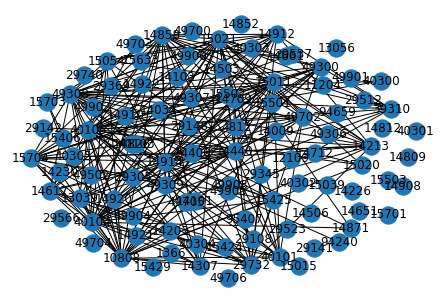

In [19]:
nx.draw_spring(senateG, edgelist = elarge,with_labels=True)
# There might be better visualizations to show this in the end. 

# Note we use draw_spring here. We used draw_networksx previously
# draw_spring Position nodes using Fruchterman-Reingold force-directed algorithm.

Take out the singletons to get a clearer picture:

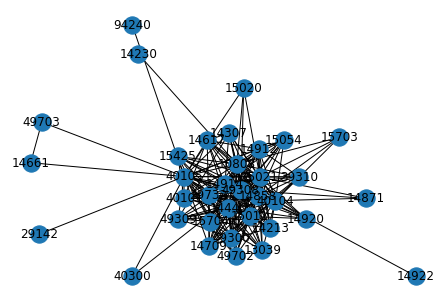

In [20]:
senateGt= nx.Graph() # Blank graph
senateGt.add_nodes_from(senateG.nodes) # Add the nodes from senateG to the blank graph
senateGt.add_edges_from(elarge) # Threshold limiter we used earlier 
deg = senateGt.degree() # The node degree is the number of edges adjacent to that node
rem = [n[0] for n in deg if n[1]==0] # LAying out criteria to take out singletons I think. 
senateGt_all = senateGt.copy() # Just to be safe
senateGt.remove_nodes_from(rem) #Actual subsetting 
nx.draw_spring(senateGt,with_labels=True)

Look at the degree distribution
- Degree is a tuple listing the group name and the number of partnerships
- Add to a dataframe
- Separate the column into two columns using .apply
- Plot a histogram

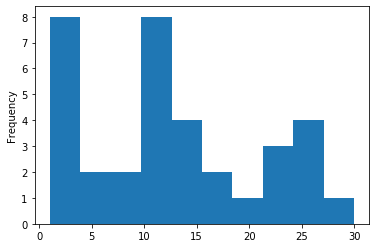

In [21]:
foo=pd.DataFrame({'tup':deg})
deg = senateGt.degree()
foo = pd.DataFrame(foo)
foo[['grp','deg']]=foo['tup'].apply(pd.Series)
foo.deg.plot.hist()

# So most have under 5 connections, but some are close to 30

Look at party in the network
- Extract the party information
- Democrats coded as 100, republicans as 200

In [22]:
party = nx.get_node_attributes(senateG,'party')
dems = []
gop = []
for i in party:
    if party[i]==100: dems.append(i)
    else: gop.append(i)

Prepare the Visualization
- Create positional coordinates for the groups with ties, and without ties
-  dictionaries to hold different sets of coordinates
- Loop through party members
    - If they have no parters, add calculated position to the lonely dictionary
    - If they have partners, add calculated position to the party dictionary

In [23]:
pos = nx.spring_layout(senateGt) # I guess the goal is for the loners to be on the outside with this
pos_all = nx.circular_layout(senateG)
dem_dict={} # Have to initiate separatelys
gop_dict={}
dem_lone = {}
gop_lone= {}
for n in dems:
    if n in rem: dem_lone[n]=pos_all[n] # Rem is the criteria we laid out earlier to signify loneliness
    else:dem_dict[n] = pos[n]
for n in gop:
    if n in rem: gop_lone[n]=pos_all[n]
    else:gop_dict[n] = pos[n]

Visualize the network by party
- Create lists of the party members who have ties
- Draw nodes in four categories using the position dictionaries we created
    - party members, untied party members

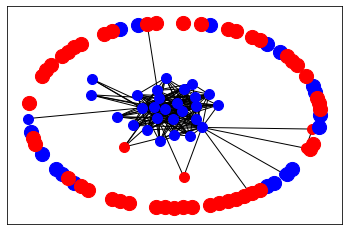

In [24]:
# Create list of members with ties by subtracting out those without
dems = list(set(dems)-set(rem)) # set() method is used to convert any of the iterable to the distinct element 
# and sorted sequence of iterable elements
gop = list(set(gop)-set(rem))
nx.draw_networkx_nodes(senateGt, pos=dem_dict, nodelist = dems,node_color='b',node_size = 100)
nx.draw_networkx_nodes(senateGt, pos=gop_dict, nodelist = gop,node_color='r', node_size = 100)
nx.draw_networkx_nodes(senateG, pos=dem_lone, nodelist = list(dem_lone.keys()),node_color='b',node_size = 200)
nx.draw_networkx_nodes(senateG, pos=gop_lone, nodelist = list(gop_lone.keys()),node_color='r', node_size = 200)
nx.draw_networkx_edges(senateGt,pos=pos, edgelist=elarge)

# So we can compound the drawing.We already differentiated spring vs circular in precious chunk
# Elarge notes which bills they were on and forms the basis of our connections

Do it again with a lower threshold:

### Modularity:
#### fraction of edges within a community minus the expected fraction if they were distributed randomly across the whole network
- High modularity >0 when there are more connections in a community than between communities
- Different algorithms to try to maximize this.
- Used a newer one from NetworkX. Run cell at end of notebook to get this algorithm